## 지수 병합

In [368]:
import pandas as pd

pd.set_option('display.max_columns', None)

cpi_df = pd.read_csv('./data/소비자물가지수.csv', encoding='CP949')
rsi_df = pd.read_csv('./data/소매판매지수.csv')
mir_df = pd.read_csv('./data/시장금리.csv', encoding='CP949')

### 소비자물가지수 전처리

In [369]:
cpi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시점      116 non-null    float64
 1   전국      116 non-null    float64
dtypes: float64(2)
memory usage: 1.9 KB


In [370]:
cpi_df["시점"] = cpi_df["시점"].astype(str)                                                                 # 데이터 타입 str로 변경
cpi_df["시점"][cpi_df["시점"].str.endswith(".1")] = cpi_df["시점"][cpi_df["시점"].str.endswith(".1")]+"0"   # 10월이 .1로 입력돼있기 때문에 0을 붙여준다.
cpi_df["시점"] = pd.to_datetime(cpi_df["시점"], format='%Y.%m')                                             # 데이터 타입 datetime으로 변경
cpi_df["시점"] = cpi_df["시점"].dt.strftime('%Y%m')                                                         # datetime 형식 설정
cpi_df.rename(columns={"시점":"날짜"}, inplace=True)                                                       # 컬럼명 변경
cpi_df.rename(columns={"전국":"소비자물가지수"}, inplace=True)                                              # 컬럼명 변경
cpi_df.set_index("날짜", inplace=True)                                                                     # 날짜 컬럼 인덱스 설정
cpi_df = cpi_df.iloc[:-4]
cpi_df

C:\Users\wndgj\AppData\Local\Temp\ipykernel_16116\3175797114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpi_df["시점"][cpi_df["시점"].str.endswith(".1")] = cpi_df["시점"][cpi_df["시점"].str.endswith(".1")]+"0"   # 10월이 .1로 입력돼있기 때문에 0을 붙여준다.


,소비자물가지수
날짜,
201211,92.011
201212,92.175
201301,92.728
201302,93.038
201303,92.952
...,...
202110,103.350
202111,103.870
202112,104.040


### 소매판매지수 전처리

In [371]:
rsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   날짜             114 non-null    object 
 1   불변_총지수         114 non-null    float64
 2   불변_총지수(승용차제외)  114 non-null    float64
 3   불변_내구재         114 non-null    float64
 4   불변_준내구재        114 non-null    float64
 5   불변_비내구재        114 non-null    float64
 6   계절_총지수         114 non-null    float64
 7   계절_총지수(승용차제외)  114 non-null    float64
 8   계절_내구재         114 non-null    float64
 9   계절_준내구재        114 non-null    float64
 10  계절_비내구재        114 non-null    float64
 11  불변_인터넷쇼핑       114 non-null    float64
 12  불변_홈쇼핑         114 non-null    float64
 13  불변_방문및배달소매점    114 non-null    float64
dtypes: float64(13), object(1)
memory usage: 12.6+ KB


In [372]:
rsi_df = rsi_df[["날짜", "불변_총지수"]]
rsi_df["날짜"] = pd.to_datetime(rsi_df["날짜"], format='%Y-%m')     # 데이터 타입 datetime으로 변경
rsi_df["날짜"] = rsi_df["날짜"].dt.strftime('%Y%m')                 # datetime 형식 설정
rsi_df.set_index("날짜", inplace=True)                              # 날짜 컬럼 인덱스 설정
rsi_df = rsi_df.iloc[:-2]
rsi_df

,불변_총지수
날짜,
201211,97.5
201212,99.8
201301,91.2
201302,86.8
201303,93.6
...,...
202110,125.0
202111,124.7
202112,127.2


### 시장금리 전처리

In [373]:
mir_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Columns: 115 entries, Unnamed: 0 to 202204월
dtypes: float64(114), object(1)
memory usage: 8.2+ KB


In [374]:
mir_df = mir_df.transpose()
mir_df = mir_df.rename(columns=mir_df.iloc[0])
mir_df = mir_df.iloc[1:-2, :7]                
mir_df

,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리
201211월,2.8,2.87,2.99,3.32,2.85,2.75,2.75
201212월,2.85,2.98,3.13,3.3,2.88,2.75,2.75
201301월,2.75,2.86,3.05,3.2,2.86,2.76,2.75
201302월,2.7,2.83,3.04,3.06,2.83,2.75,2.75
201303월,2.6,2.69,2.91,2.95,2.81,2.74,2.75
...,...,...,...,...,...,...,...
202110월,1.84,2.15,2.4,2.3,1.08,0.74,0.75
202111월,1.95,2.17,2.36,2.49,1.17,0.8,1.0
202112월,1.8,1.98,2.19,2.41,1.27,1.01,1.0
202201월,2.06,2.28,2.49,2.63,1.39,1.19,1.25


In [375]:
mir_df.reset_index(inplace=True)                                        # 인덱스 재설정
mir_df["index"] = pd.to_datetime(mir_df["index"], format='%Y%m월')      # 데이터 타입 datetime으로 변경
mir_df["index"] = mir_df["index"].dt.strftime('%Y%m')                   # datetime 형식 설정
mir_df.rename(columns={"index":"날짜"}, inplace=True)                   # 컬럼명 변경
mir_df.set_index("날짜", inplace=True)                                  # 날짜 컬럼 인덱스 설정
mir_df.columns = mir_df.columns.str.replace("?", " ")                   # 컬럼명 불필요 문자 제거
mir_df.head()

C:\Users\wndgj\AppData\Local\Temp\ipykernel_16116\1137828608.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  mir_df.columns = mir_df.columns.str.replace("?", " ")                   # 컬럼명 불필요 문자 제거


,국고채 3년(평균),국고채 5년(평균),국고채 10년(평균),회사채 3년(평균),CD 91물(평균),"콜금리(1일물,평균)",기준금리
날짜,,,,,,,
201211,2.8,2.87,2.99,3.32,2.85,2.75,2.75
201212,2.85,2.98,3.13,3.3,2.88,2.75,2.75
201301,2.75,2.86,3.05,3.2,2.86,2.76,2.75
201302,2.7,2.83,3.04,3.06,2.83,2.75,2.75
201303,2.6,2.69,2.91,2.95,2.81,2.74,2.75


In [376]:
indexes_df = pd.merge(cpi_df, rsi_df, how="left", left_index=True, right_index=True)
indexes_df = pd.merge(indexes_df, mir_df, how="left", left_index=True, right_index=True)
indexes_df.drop_duplicates(inplace=True)
indexes_df

,소비자물가지수,불변_총지수,국고채 3년(평균),국고채 5년(평균),국고채 10년(평균),회사채 3년(평균),CD 91물(평균),"콜금리(1일물,평균)",기준금리
날짜,,,,,,,,,
201211,92.011,97.5,2.8,2.87,2.99,3.32,2.85,2.75,2.75
201212,92.175,99.8,2.85,2.98,3.13,3.3,2.88,2.75,2.75
201301,92.728,91.2,2.75,2.86,3.05,3.2,2.86,2.76,2.75
201302,93.038,86.8,2.7,2.83,3.04,3.06,2.83,2.75,2.75
201303,92.952,93.6,2.6,2.69,2.91,2.95,2.81,2.74,2.75
...,...,...,...,...,...,...,...,...,...
202110,103.350,125.0,1.84,2.15,2.4,2.3,1.08,0.74,0.75
202111,103.870,124.7,1.95,2.17,2.36,2.49,1.17,0.8,1.0
202112,104.040,127.2,1.8,1.98,2.19,2.41,1.27,1.01,1.0


### 카드 소비 전처리

In [377]:
card_df = pd.read_csv('./data/card_all_df.csv')

In [378]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 42 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   날짜            114 non-null    object 
 1   합계            114 non-null    float64
 2   종합소매          114 non-null    float64
 3   백화점           114 non-null    float64
 4   대형마트/유통전문점    114 non-null    float64
 5   슈퍼마켓          114 non-null    float64
 6   편의점           114 non-null    float64
 7   면세점           114 non-null    float64
 8   전자상거래/통신판매    114 non-null    float64
 9   식료품           114 non-null    float64
 10  일반식료품         114 non-null    float64
 11  건강보조식품        114 non-null    float64
 12  의류/잡화         114 non-null    float64
 13  의복/직물         114 non-null    float64
 14  복식잡화          114 non-null    float64
 15  시계/귀금속/안경     114 non-null    float64
 16  화장품           114 non-null    float64
 17  연료            114 non-null    float64
 18  가구/가전         114 non-null    

In [379]:
card_df["날짜"] = pd.to_datetime(card_df["날짜"], format='%Y-%m')     # 데이터 타입 datetime으로 변경
card_df["날짜"] = card_df["날짜"].dt.strftime('%Y%m')                 # datetime 형식 설정
card_df.set_index("날짜", inplace=True)                               # 날짜 컬럼 인덱스 설정
card_df = card_df.iloc[:-2]

In [380]:
clothes_df = card_df["의류/잡화"]
clothes_df = pd.DataFrame(clothes_df)
clothes_df.head()

,의류/잡화
날짜,
201211,14573.28
201212,14114.97
201301,11912.48
201302,11094.71
201303,13126.75


In [381]:
clothes_df = pd.merge(clothes_df, indexes_df, how="left", left_index=True, right_index=True)
clothes_df.head()

,의류/잡화,소비자물가지수,불변_총지수,국고채 3년(평균),국고채 5년(평균),국고채 10년(평균),회사채 3년(평균),CD 91물(평균),"콜금리(1일물,평균)",기준금리
날짜,,,,,,,,,,
201211,14573.28,92.011,97.5,2.8,2.87,2.99,3.32,2.85,2.75,2.75
201212,14114.97,92.175,99.8,2.85,2.98,3.13,3.3,2.88,2.75,2.75
201301,11912.48,92.728,91.2,2.75,2.86,3.05,3.2,2.86,2.76,2.75
201302,11094.71,93.038,86.8,2.7,2.83,3.04,3.06,2.83,2.75,2.75
201303,13126.75,92.952,93.6,2.6,2.69,2.91,2.95,2.81,2.74,2.75


In [382]:
clothes_df["의류/잡화"] = clothes_df["의류/잡화"].pct_change()
clothes_df["소비자물가지수"] = clothes_df["소비자물가지수"].pct_change()
clothes_df["불변_총지수"] = clothes_df["불변_총지수"].pct_change()
clothes_df["국고채 3년(평균)_등락률"] = clothes_df["국고채 3년(평균)"].pct_change()
clothes_df["국고채 5년(평균)_등락률"] = clothes_df["국고채 5년(평균)"].pct_change()
clothes_df["국고채 10년(평균)_등락률"] = clothes_df["국고채 10년(평균)"].pct_change()
clothes_df["회사채 3년(평균)_등락률"] = clothes_df["회사채 3년(평균)"].pct_change()
clothes_df["CD 91물(평균)_등락률"] = clothes_df["CD 91물(평균)"].pct_change()
clothes_df["콜금리(1일물,평균)_등락률"] = clothes_df["콜금리(1일물,평균)"].pct_change()
clothes_df["기준금리_등락률"] = clothes_df["기준금리"].pct_change()
clothes_df = clothes_df.iloc[1:]
clothes_df.head(5)

,의류/잡화,소비자물가지수,불변_총지수,국고채 3년(평균),국고채 5년(평균),국고채 10년(평균),회사채 3년(평균),CD 91물(평균),"콜금리(1일물,평균)",기준금리,국고채 3년(평균)_등락률,국고채 5년(평균)_등락률,국고채 10년(평균)_등락률,회사채 3년(평균)_등락률,CD 91물(평균)_등락률,"콜금리(1일물,평균)_등락률",기준금리_등락률
날짜,,,,,,,,,,,,,,,,,
201212,-0.031449,0.001782,0.023590,2.85,2.98,3.13,3.3,2.88,2.75,2.75,0.017857,0.038328,0.046823,-0.006024,0.010526,0.000000,0.0
201301,-0.156039,0.005999,-0.086172,2.75,2.86,3.05,3.2,2.86,2.76,2.75,-0.035088,-0.040268,-0.025559,-0.030303,-0.006944,0.003636,0.0
201302,-0.068648,0.003343,-0.048246,2.7,2.83,3.04,3.06,2.83,2.75,2.75,-0.018182,-0.010490,-0.003279,-0.043750,-0.010490,-0.003623,0.0
201303,0.183154,-0.000924,0.078341,2.6,2.69,2.91,2.95,2.81,2.74,2.75,-0.037037,-0.049470,-0.042763,-0.035948,-0.007067,-0.003636,0.0
201304,-0.009763,-0.001388,-0.018162,2.55,2.63,2.84,2.91,2.8,2.75,2.75,-0.019231,-0.022305,-0.024055,-0.013559,-0.003559,0.003650,0.0


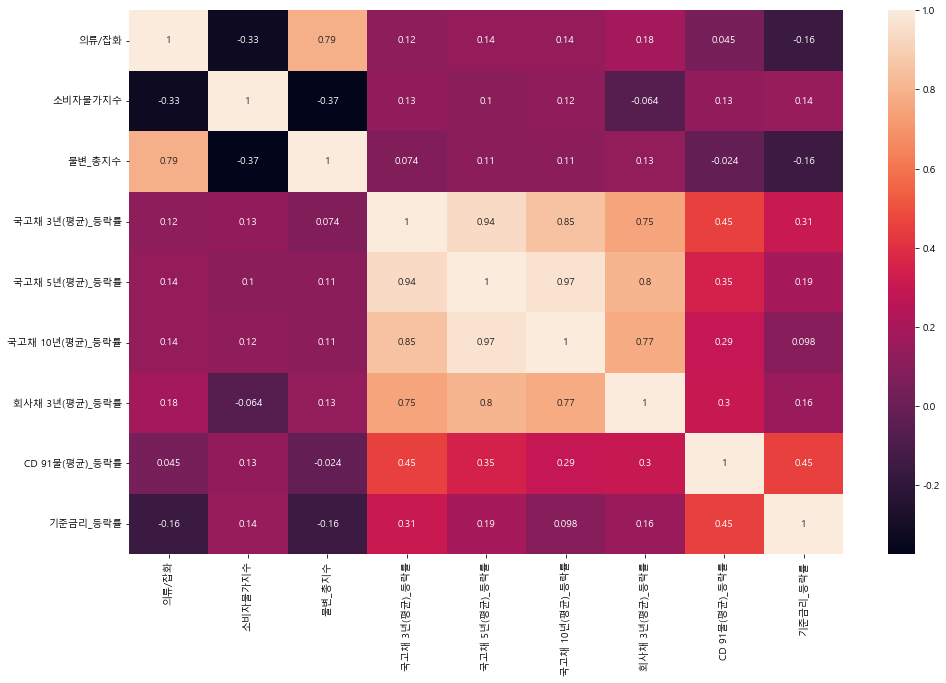

In [383]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(16,10))

sns.heatmap(clothes_df[['의류/잡화', '소비자물가지수', '불변_총지수', '국고채 3년(평균)_등락률',
       '국고채 5년(평균)_등락률', '국고채 10년(평균)_등락률','회사채 3년(평균)_등락률', 'CD 91물(평균)_등락률', '콜금리(1일물,평균)', '기준금리_등락률']].corr(), annot=True)

plt.show()